In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
old_train = pd.read_csv('drive/Shareddrives/Machine Learning/Project/fraudTrain.csv', index_col=0)
old_test = pd.read_csv('drive/Shareddrives/Machine Learning/Project/fraudTest.csv', index_col=0)
old_train['Test'] = 0
old_test['Test'] = 1
df_old = pd.concat([old_train, old_test])
df_old.head(10)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Test
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,...,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,0
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,...,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,0
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,0
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,0
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,...,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,0


In [ ]:
def process_fraud_data(input):
    df = input.copy()
    # Ensure 'trans_date_trans_time' is in datetime format
    df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
    df['unix_time'] = pd.to_datetime(df['unix_time'], unit='s')

    # Get month of year, day of week, and hour of day for transactions
    df['trans_day_of_week'] = df['trans_date_trans_time'].dt.day_name()
    df['trans_month'] = df['trans_date_trans_time'].dt.month_name()

    # Create 'time_of_day' column
    df['time_of_day'] = (df['trans_date_trans_time'].dt.hour * 60 + df['trans_date_trans_time'].dt.minute) / (24 * 60)

    # Calculate age in years
    df['dob'] = pd.to_datetime(df['dob'])
    df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year - (
        (df['trans_date_trans_time'].dt.month < df['dob'].dt.month) |
        ((df['trans_date_trans_time'].dt.month == df['dob'].dt.month) & (df['trans_date_trans_time'].dt.day < df['dob'].dt.day))
    )

    # Sort the DataFrame by 'cc_num' and 'trans_date_trans_time'
    df.sort_values(by=['cc_num', 'trans_date_trans_time'], inplace=True)

    # Group by 'cc_num' and calculate the time difference
    df['last_purchased'] = df.groupby('cc_num')['trans_date_trans_time'].diff()

    # For the first transaction for each 'cc_num', set 'last_purchased' to NaT
    df['last_purchased'] = df['last_purchased'].fillna(pd.NaT)

    # Convert 'last_purchased' to numerical format (total number of seconds)
    df['last_purchased_secs'] = df['last_purchased'].dt.total_seconds()

    # Define the Haversine distance function
    def haversine(lat1, lon1, lat2, lon2):
        R = 6371  # Radius of the Earth in kilometers
        lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
        return R * c

    # Calculate the distance to the last purchase
    df['last_merch_lat'] = df.groupby('cc_num')['merch_lat'].shift()
    df['last_merch_long'] = df.groupby('cc_num')['merch_long'].shift()

    df['distance_last_purchase'] = haversine(df['merch_lat'], df['merch_long'], df['last_merch_lat'], df['last_merch_long'])

    # For the first transaction for each 'cc_num', set 'distance_last_purchase' to NaN
    df['distance_last_purchase'] = df['distance_last_purchase'].fillna(np.nan)

    # Create 'same_merchant_with_last_purchase' column
    df['last_merchant'] = df.groupby('cc_num')['merchant'].shift()
    df['same_merchant_with_last_purchase'] = (df['merchant'] == df['last_merchant'])

    # Drop the temporary columns
    df.drop(columns=['last_merch_lat', 'last_merch_long', 'last_merchant'], inplace=True)

    # Drop rows where transatction date is from January 2019
    #df = df[df['trans_date_trans_time'] > '2019-01-07']

    # Drop the specified columns
    df.drop(columns=['last_purchased', 'city', 'street', 'last', 'first', 'job', 'cc_num', 'merchant', 'trans_date_trans_time', 'state', 'zip', 'lat', 'long', 'merch_lat', 'merch_long', 'trans_num', 'unix_time', 'dob'], inplace=True)

    # Sort the DataFrame by the original index to maintain the original order
    df.sort_index(inplace=True)

    return df

In [ ]:
df = process_fraud_data(df_old)
df.head(10)

,category,amt,gender,city_pop,is_fraud,Test,trans_day_of_week,trans_month,time_of_day,age,last_purchased_secs,distance_last_purchase,same_merchant_with_last_purchase
0,misc_net,4.97,F,3495,0,0,Tuesday,January,0.000000,30,NaN,NaN,False
0,personal_care,2.86,M,333497,0,1,Sunday,June,0.509722,52,91343.0,136.963151,False
1,grocery_pos,107.23,F,149,0,0,Tuesday,January,0.000000,40,NaN,NaN,False
1,personal_care,29.84,F,302,0,1,Sunday,June,0.509722,30,23568.0,14.882199,False
2,entertainment,220.11,M,4154,0,0,Tuesday,January,0.000000,56,NaN,NaN,False
2,health_fitness,41.28,F,34496,0,1,Sunday,June,0.509722,49,14966.0,69.778120,False
3,misc_pos,60.05,M,54767,0,1,Sunday,June,0.510417,32,71865.0,52.822129,False
3,gas_transport,45.00,M,1939,0,0,Tuesday,January,0.000694,51,NaN,NaN,False
4,misc_pos,41.96,M,99,0,0,Tuesday,January,0.002083,32,NaN,NaN,False
4,travel,3.19,M,1126,0,1,Sunday,June,0.510417,64,10122.0,42.854123,False


In [ ]:
df_encoded = pd.get_dummies(df, columns=['category','gender', 'trans_day_of_week', 'trans_month'],
                            dtype='int', drop_first=True).drop(columns=['Test'])

new_users = df_encoded[df_encoded['last_purchased_secs'].isna()]
new_users = new_users.drop(columns=['last_purchased_secs', 'distance_last_purchase'])
returners = df_encoded[df_encoded['last_purchased_secs'].notna()]

# new_train = new_users[new_users['Test'] == 0].drop(columns=['Test'])
# new_test = new_users[new_users['Test'] == 1].drop(columns=['Test'])
new_train, new_test = train_test_split(new_users, test_size=0.2, random_state=5555)
new_outlier_prop = new_train['is_fraud'].mean()

# return_train = returners[returners['Test'] == 0].drop(columns=['Test'])
# return_test = returners[returners['Test'] == 1].drop(columns=['Test'])
return_train, return_test = train_test_split(returners, test_size=0.2, random_state=5555)
return_outlier_prop = return_train['is_fraud'].mean()

(new_outlier_prop, return_outlier_prop)

(0.08260325406758448, 0.005191355707453028)

In [ ]:
from sklearn.ensemble import IsolationForest

def predict(train, test, outlier_prop):
    X_train = train.drop(columns=['is_fraud'])
    y_train = train['is_fraud']
    X_test = test.drop(columns=['is_fraud'])
    y_test = test['is_fraud']
    model = IsolationForest(contamination=outlier_prop)
    model.fit(X_train)
    train_preds = np.where(model.predict(X_train) == -1, 1, 0)
    test_preds = np.where(model.predict(X_test) == -1, 1, 0)
    return train_preds, test_preds

#new_train_preds, new_test_preds = predict(new_train, new_test, new_outlier_prop)
return_train_preds, return_test_preds = predict(return_train, return_test, return_outlier_prop)

np.mean(return_test_preds)


0.0051177625520215835

In [ ]:
#(new_train_preds == new_train['is_fraud']).mean(), (new_test_preds == new_test['is_fraud']).mean()

(0.9724655819774718, 0.965)

In [ ]:
(return_train_preds == return_train['is_fraud']).mean(), (return_test_preds == return_test['is_fraud']).mean()

(0.9899386678693634, 0.9901101601765155)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

#print(classification_report(new_train['is_fraud'], new_train_preds))
#print(classification_report(new_test['is_fraud'], new_test_preds))
print(classification_report(return_train['is_fraud'], return_train_preds))
print(classification_report(return_test['is_fraud'], return_test_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1473427
           1       0.03      0.03      0.03      7689

    accuracy                           0.99   1481116
   macro avg       0.51      0.51      0.51   1481116
weighted avg       0.99      0.99      0.99   1481116

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    368408
           1       0.03      0.03      0.03      1871

    accuracy                           0.99    370279
   macro avg       0.51      0.51      0.51    370279
weighted avg       0.99      0.99      0.99    370279



In [ ]:
df[df['last_purchased_secs'].isna()]

# Only 90 of the 999 first-time purchases are after 1/14/2019
# 96 after 1/7/2019

#new_test
#new_train['is_fraud'].mean()

#

,category,amt,gender,city_pop,is_fraud,Test,trans_day_of_week,trans_month,time_of_day,age,last_purchased_secs,distance_last_purchase,same_merchant_with_last_purchase
0,misc_net,4.97,F,3495,0,0,Tuesday,January,0.000000,30,NaN,NaN,False
1,grocery_pos,107.23,F,149,0,0,Tuesday,January,0.000000,40,NaN,NaN,False
2,entertainment,220.11,M,4154,0,0,Tuesday,January,0.000000,56,NaN,NaN,False
3,gas_transport,45.00,M,1939,0,0,Tuesday,January,0.000694,51,NaN,NaN,False
4,misc_pos,41.96,M,99,0,0,Tuesday,January,0.002083,32,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186804,gas_transport,6.47,M,3733,1,0,Monday,May,0.061806,57,NaN,NaN,False
1190005,gas_transport,12.56,F,17081,1,0,Tuesday,May,0.031944,65,NaN,NaN,False
1230734,shopping_pos,1002.39,M,31702,1,0,Thursday,May,0.939583,86,NaN,NaN,False
1258483,shopping_pos,1324.80,F,777,1,0,Sunday,June,0.923611,23,NaN,NaN,False


In [ ]:
from sklearn.model_selection import GridSearchCV

X = returners.drop(columns=['is_fraud'])
y = np.where(returners['is_fraud'] == 1, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5555)

model = IsolationForest(contamination=(-(y_train-1)/2).mean())

param_grid = {
    'n_estimators': [200], #[100, 200],
    'max_samples': [256], #[128, 256, 512],
    'max_features': [0.5] #[0.25, 0.5, 0.75, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, scoring='roc_auc', verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_features=0.5, max_samples=256, n_estimators=200; total time=  33.2s
[CV] END max_features=0.5, max_samples=256, n_estimators=200; total time=  34.0s
[CV] END max_features=0.5, max_samples=256, n_estimators=200; total time=  33.3s
[CV] END max_features=0.5, max_samples=256, n_estimators=200; total time=  34.0s
[CV] END max_features=0.5, max_samples=256, n_estimators=200; total time=  33.5s


GridSearchCV(cv=5,
             estimator=IsolationForest(contamination=0.005191355707453028),
             param_grid={'max_features': [0.5], 'max_samples': [256],
                         'n_estimators': [200]},
             scoring='roc_auc', verbose=2)

In [ ]:
from sklearn.metrics import confusion_matrix
# Best parameters: {'max_features': 0.5, 'max_samples': 256, 'n_estimators': 200}
# Best score: 0.8146346940798507
# Precision and recall are 0.18
y_pred = grid_search.predict(X_test)

y_pred1 = np.where(y_pred == -1, 1, 0)
y_test1 = np.where(y_test == -1, 1, 0)
print(classification_report(y_test1, y_pred1))

print(confusion_matrix(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    368408
           1       0.09      0.09      0.09      1871

    accuracy                           0.99    370279
   macro avg       0.54      0.54      0.54    370279
weighted avg       0.99      0.99      0.99    370279

[[366690   1718]
 [  1706    165]]


In [ ]:
165/(165+1706)

0.08818813468733298

In [ ]:
baseline = np.zeros(len(y_test))
baseline[0:1871] = np.ones(1871)
print(classification_report(y_test, baseline))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    368408
           1       0.01      0.01      0.01      1871

    accuracy                           0.99    370279
   macro avg       0.50      0.50      0.50    370279
weighted avg       0.99      0.99      0.99    370279



In [ ]:
precisions = []
recalls = []
matrices = []
for i in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
  model = IsolationForest(max_features=0.5, max_samples=256,
                          n_estimators = 200, contamination=(-(y_train-1)/2).mean())
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  precison = tn/(tn+fn)
  recall = tn/(tn+fp)
  precisions.append(precison)
  recalls.append(recall)

[0.03460208 0.06022187 0.09247094 0.09536082 0.11111111 0.11683673
 0.11886305 0.13452188 0.14528102 0.27605779]


Text(0, 0.5, 'Frequency')

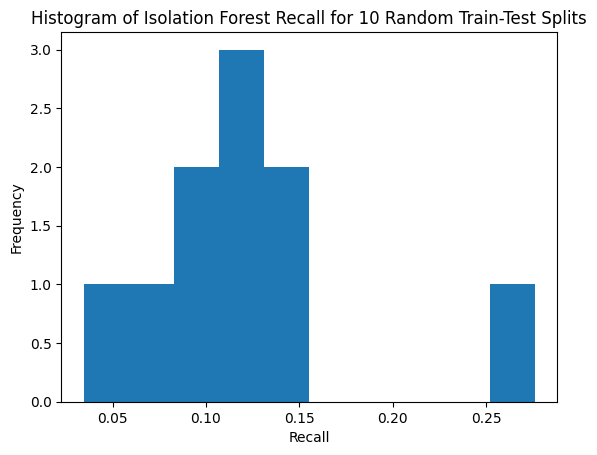

In [ ]:
import matplotlib.pyplot as plt
print(np.sort(recalls))
plt.hist(recalls, bins=10)
plt.title("Histogram of Isolation Forest Recall for 10 Random Train-Test Splits")
plt.xlabel("Recall")
plt.ylabel("Frequency")

(array([2., 0., 2., 4., 1., 0., 0., 0., 0., 1.]),
 array([0.03703704, 0.06170025, 0.08636346, 0.11102667, 0.13568988,
        0.16035309, 0.1850163 , 0.20967951, 0.23434272, 0.25900593,
        0.28366914]),
 <BarContainer object of 10 artists>)

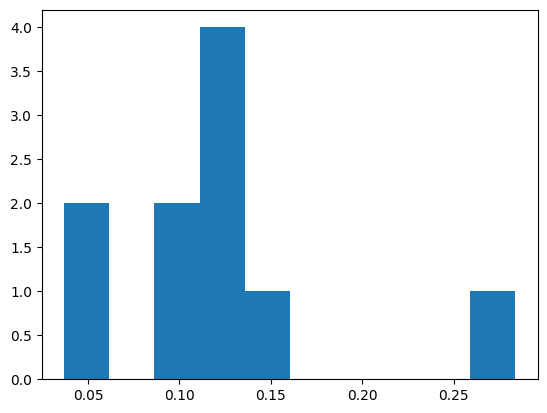

In [ ]:
plt.hist(precisions)

In [ ]:
df[df['is_fraud'] == 1].shape[0]/2

4825.5